In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
c = wine_quality.data.original.color
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
wine_quality.data.original

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Análise Exploratória

Para nossa análise exploratória, utilizaremos o StandardScaler do sklearn para normalizar as variáveis. Esse algoritmo aplica uma transformação que reescala as variáveis para uma média de 0 e um desvio padrão de 1. Essa normalização é importante porque muitos algoritmos de aprendizado de máquina performam melhor ou convergem mais rapidamente quando os atributos estão na mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["colors"] = c
print(X_scaled_df.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol colors  
0 -0.915464    red  
1 -0.580068   

O próximo passo é fazer um pairplot (seaborn) e calcular a matriz de correlação.

In [5]:
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

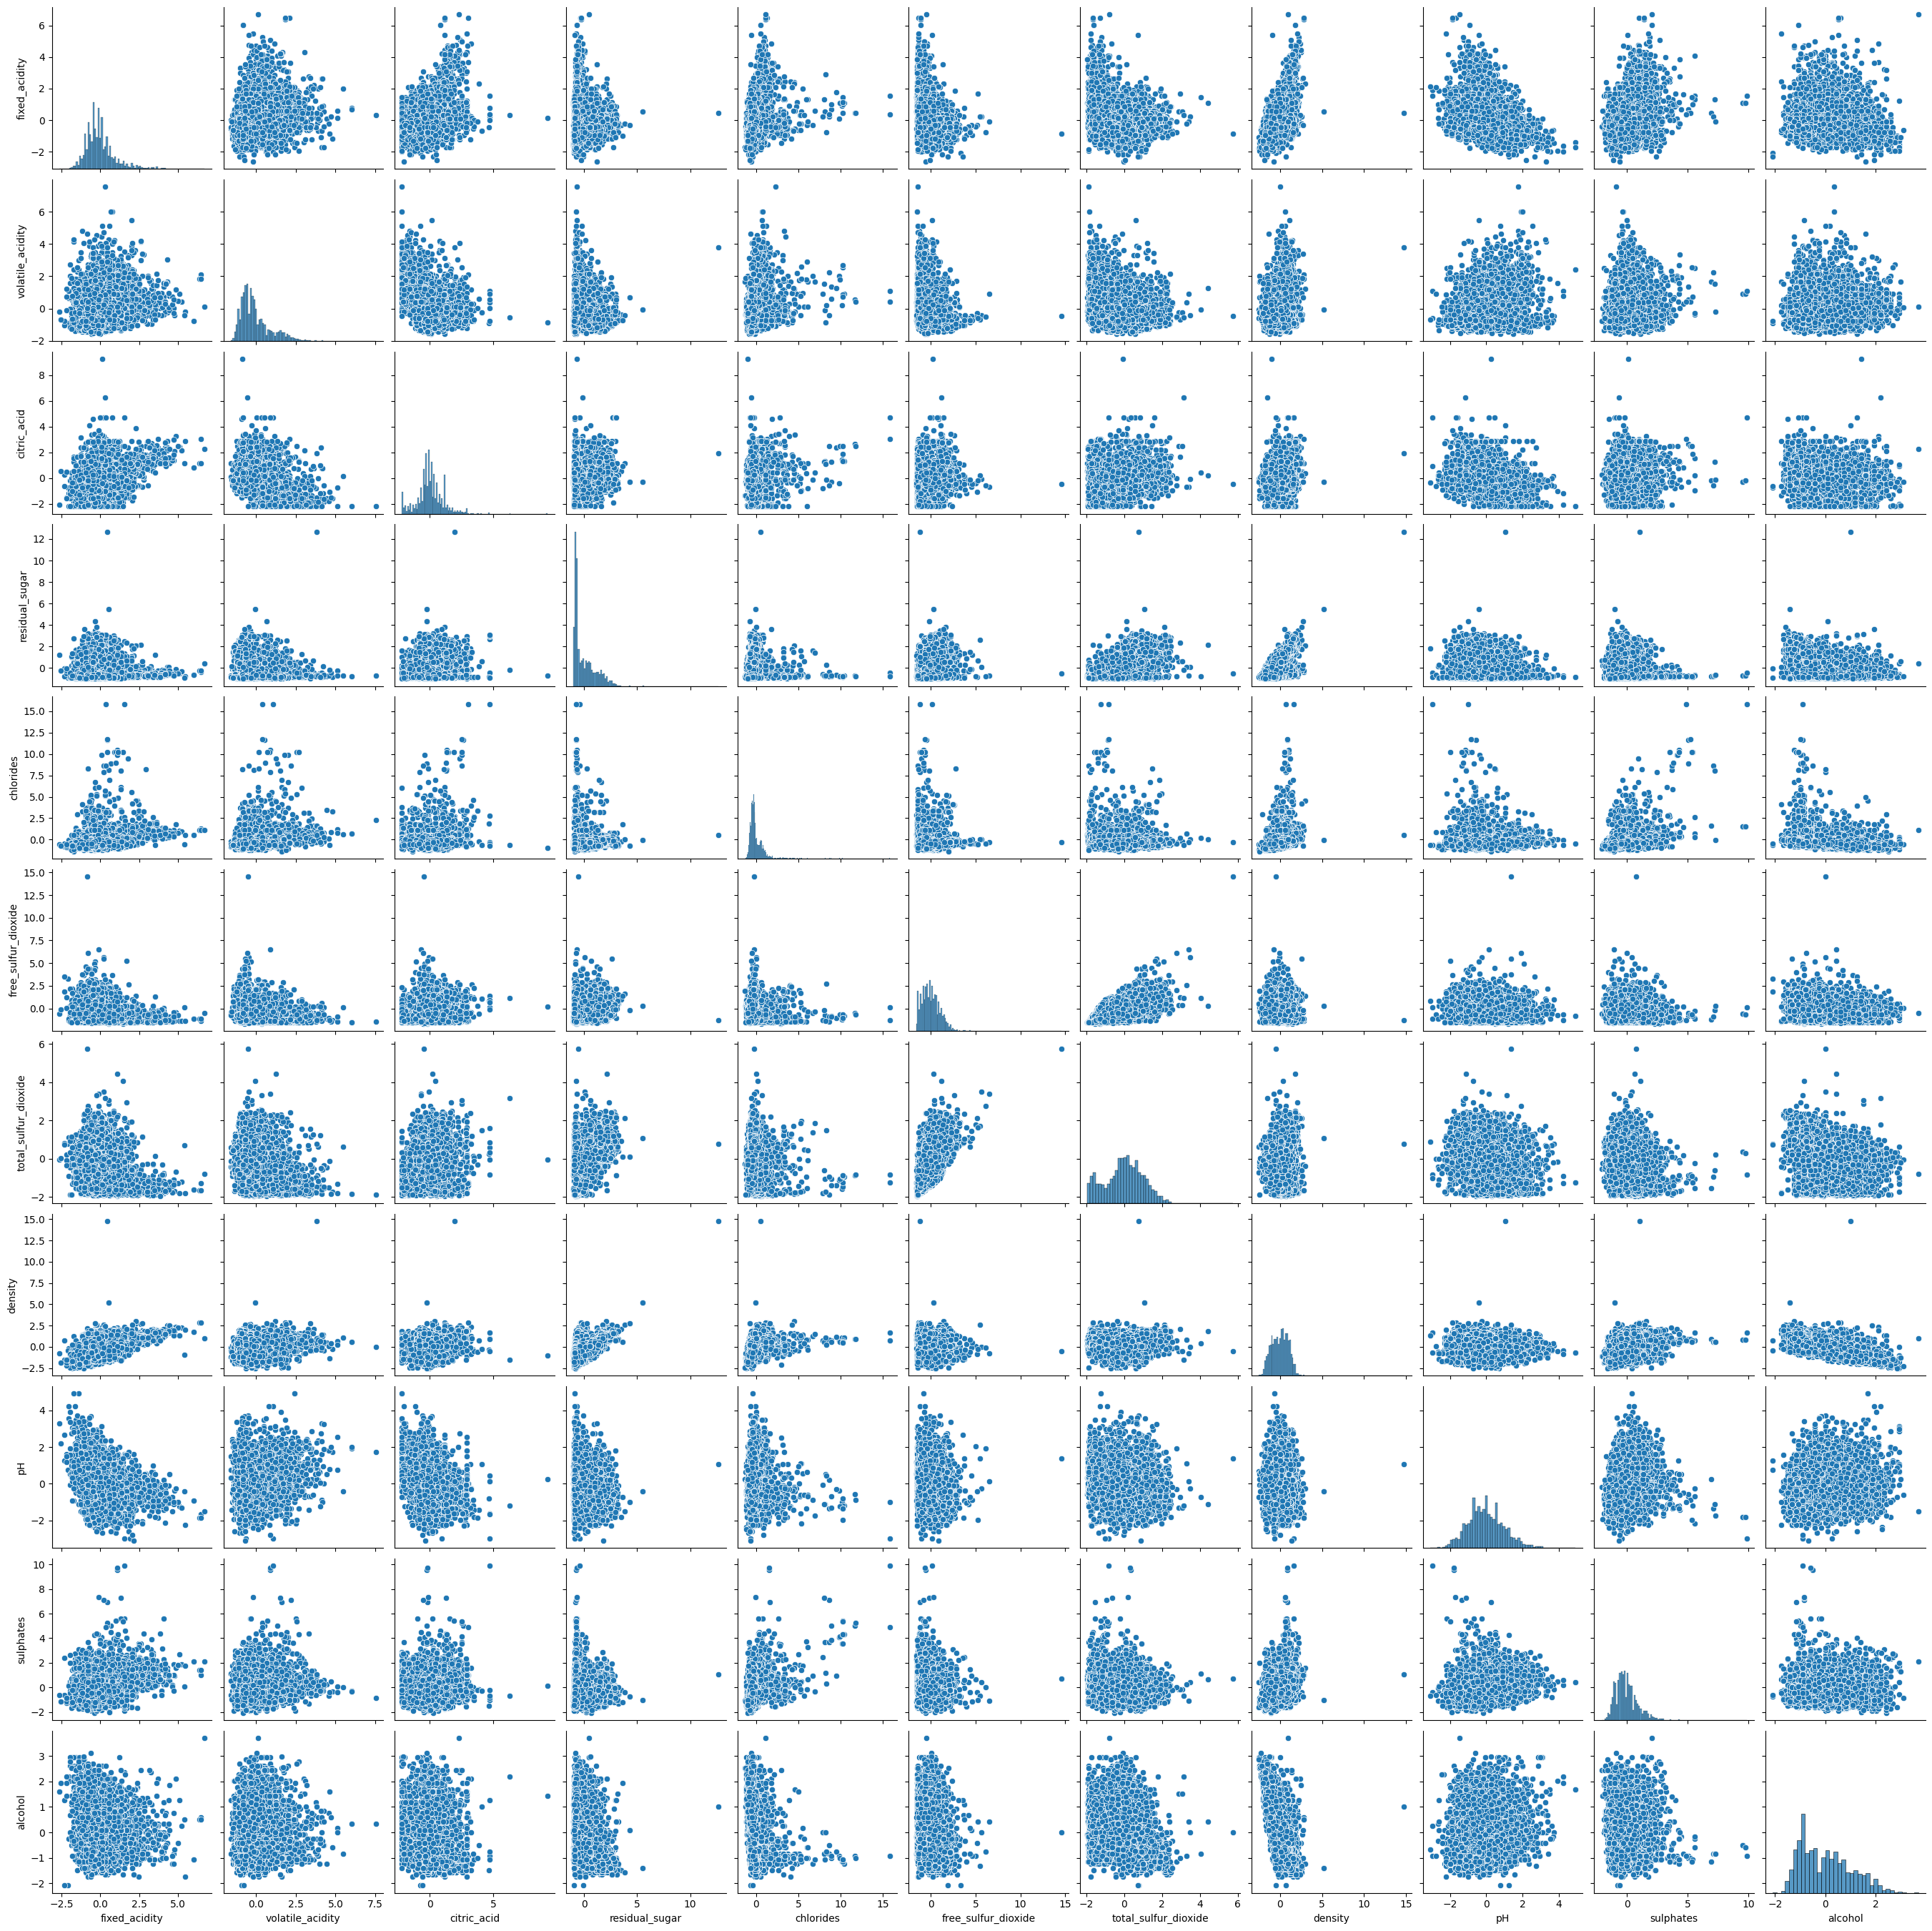

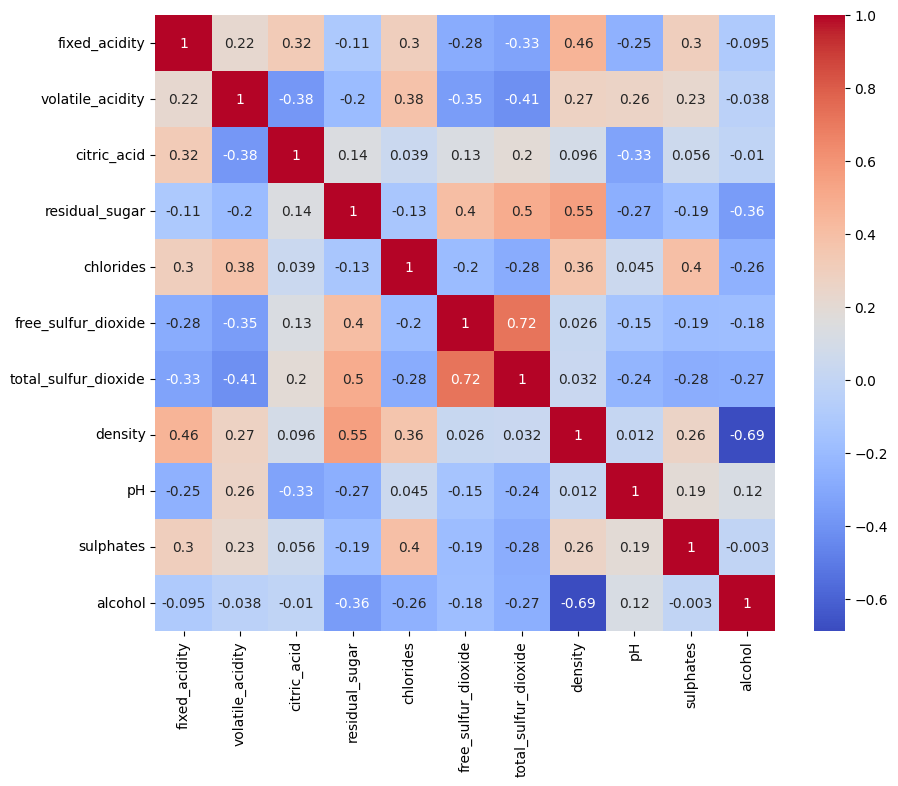

In [ ]:
sns.pairplot(X_scaled_df)
plt.show()

corr_matrix = X_scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

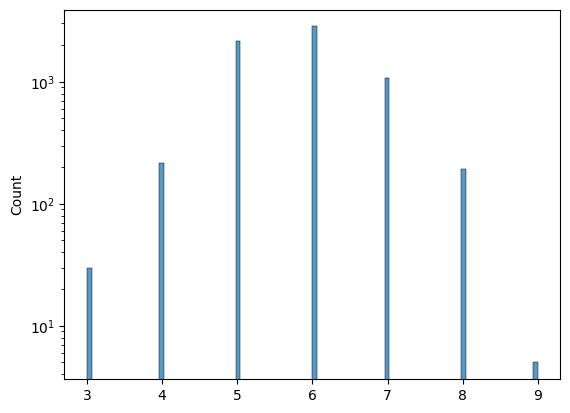

In [8]:
sns.histplot(y.quality.values,bins=100)
plt.yscale('log')
plt.show()

As variáveis free_sulfur_dioxide e total_sulfur_dioxide demonstram uma forte correlação entre si, assim como alcohol e sulphates. Nesse cenário, a aplicação de técnicas de regressão com regularização pode ser particularmente benéfica, pois permite lidar com a multicolinearidade, potencialmente reduzindo o impacto negativo sobre o modelo. Uma abordagem a considerar seria a eliminação de uma das variáveis correlacionadas de cada par (ou seja, escolher entre free_sulfur_dioxide e total_sulfur_dioxide, bem como entre alcohol e sulphates, com o intuito de simplificar o modelo sem perder informações cruciais.

Prosseguindo com a preparação dos dados, dividiremos o conjunto em partes de treinamento e teste. Alocaremos 70% dos dados para o treinamento, permitindo que o modelo aprenda e se ajuste às nuances dos dados, enquanto os restantes 30% serão destinados ao teste, utilizados posteriormente para avaliar a capacidade de generalização do modelo e a precisão das suas previsões em dados não vistos anteriormente. Essa separação é crucial para garantir que o modelo seja robusto e eficaz na prática.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3761,2.070989,0.913197,-0.609973,-0.639680,0.883966,-0.649386,-0.013174,0.034473,-2.789621,-0.613385,-0.915464,white
3740,0.373895,-0.362438,0.215866,2.071864,-0.000967,0.026746,0.022213,1.702006,0.320319,-0.210144,-0.747766,white
1359,3.382379,0.822080,0.559966,-0.849877,0.998151,-1.381861,-1.552520,0.781528,-0.923657,0.797958,-0.384420,red
1230,0.373895,-0.969884,0.147046,-0.576620,0.284496,-0.874763,-1.021711,0.001123,0.942306,1.671647,1.096912,red
4751,0.296754,-0.544672,6.272023,-0.177246,-0.600437,1.153631,3.153986,-1.506327,-1.172452,-0.680592,2.186949,white
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.296754,-0.119460,1.798725,2.376650,-0.172244,0.702877,0.836120,1.735356,-0.426067,0.058683,-1.083162,white
5191,-1.246058,-0.362438,-0.334694,-0.324384,-0.372068,1.209975,0.747652,-0.892675,0.817909,-0.613385,0.174573,white
5226,-0.628933,0.184263,-0.816433,0.032951,1.740353,1.717074,1.189993,-0.035563,0.133722,-0.680592,-0.831615,white
5390,-0.551792,-0.483928,1.248165,0.537425,-0.143698,0.871910,1.437704,0.221237,-0.239471,-0.411765,-0.831615,white


In [ ]:
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,colors
3103,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308,white
1419,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219,red
4761,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610,white
4690,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615,white
4032,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709,white
...,...,...,...,...,...,...,...,...,...,...,...,...
4294,-1.168917,-0.666161,-0.265874,0.884250,-0.885900,-0.254976,0.092988,-0.732592,0.382517,-1.016626,0.677667,white
3757,0.142473,-0.969884,-0.334694,-0.870896,-0.229336,-0.254976,-0.190111,-0.232332,1.875288,0.865165,0.090724,white
5954,-0.628933,-0.180205,-0.265874,-0.618660,-0.486252,0.195778,0.376086,-1.746451,0.009325,-1.016626,1.851553,white
4418,-0.937495,-0.787650,0.147046,-0.723758,-0.400614,1.829762,0.128375,-1.392935,1.377698,-0.747799,0.761516,white


In [ ]:
y_train.quality.values

array([6, 5, 6, ..., 5, 5, 5])

# O modelo Bayesiano

In [ ]:
df = X_train
fixed_acidity_train = df['fixed_acidity'].values
volatile_acidity_train = df['volatile_acidity'].values
citric_acid_train = df['citric_acid'].values
residual_sugar_train = df['residual_sugar'].values
chlorides_train = df['chlorides'].values
free_sulfur_dioxide_train = df['free_sulfur_dioxide'].values
total_sulfur_dioxide_train = df['total_sulfur_dioxide'].values
density_train = df['density'].values
pH_train = df['pH'].values
sulphates_train = df['sulphates'].values
alcohol_train = df['alcohol'].values
colors_train = df['colors'].values

In [ ]:
with pm.Model() as regression:
  betas = pm.Normal("betas",0,1,shape=11)
  alpha = pm.Normal("alpha",0,1)
  eps = pm.HalfNormal("eps",1)

  mu = alpha + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

# Análise Preditiva a Priori

In [ ]:
with regression:
  trace_priori = pm.sample_prior_predictive()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


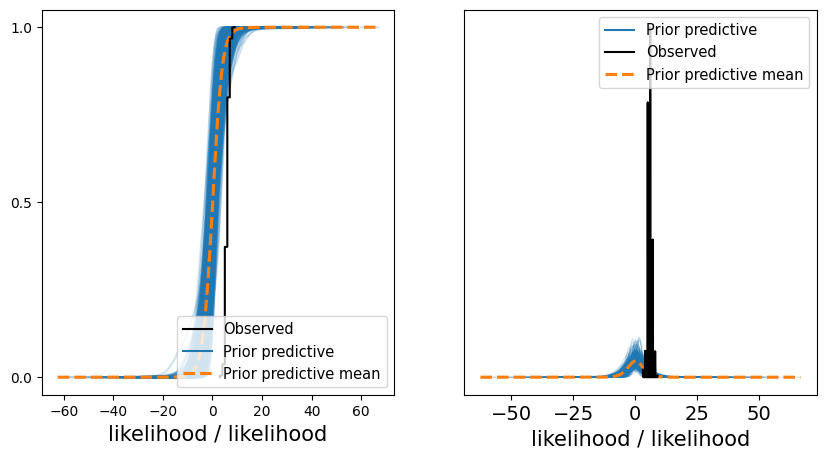

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori, group='prior',ax=axes[1])

# Aprendizado dos parâmetros

In [ ]:
with regression:
  trace_reg = pm.sample()

pm.summary(trace_reg)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.104,0.023,0.058,0.147,0.001,0.000,1169.0,1251.0,1.0
betas[1],-0.228,0.015,-0.254,-0.199,0.000,0.000,2023.0,1510.0,1.0
betas[2],-0.021,0.014,-0.048,0.003,0.000,0.000,2288.0,1626.0,1.0
betas[3],0.232,0.029,0.179,0.285,0.001,0.001,1042.0,1254.0,1.0
betas[4],-0.002,0.015,-0.032,0.025,0.000,0.000,2138.0,1685.0,1.0
betas[5],0.123,0.017,0.093,0.155,0.000,0.000,1800.0,1294.0,1.0
betas[6],-0.150,0.020,-0.185,-0.112,0.000,0.000,2010.0,1481.0,1.0
betas[7],-0.184,0.042,-0.260,-0.104,0.001,0.001,970.0,846.0,1.0
betas[8],0.074,0.017,0.041,0.106,0.000,0.000,1339.0,1577.0,1.0
betas[9],0.120,0.014,0.093,0.147,0.000,0.000,1997.0,1387.0,1.0


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'eps'}>, <Axes: title={'center': 'eps'}>]],
      dtype=object)

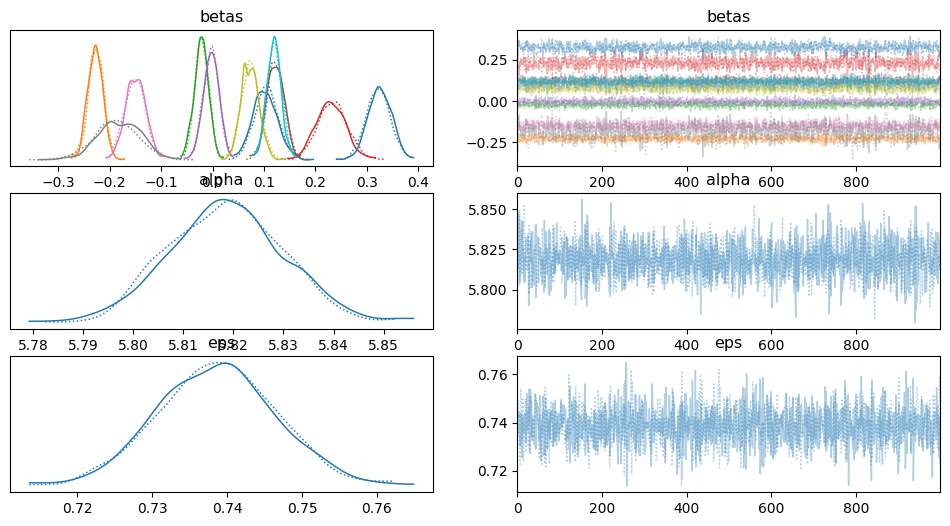

In [ ]:
az.plot_trace(trace_reg)

# Análise Preditiva a Posteriori

In [ ]:
with regression:
    trace_reg_post = pm.sample_posterior_predictive(trace_reg)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


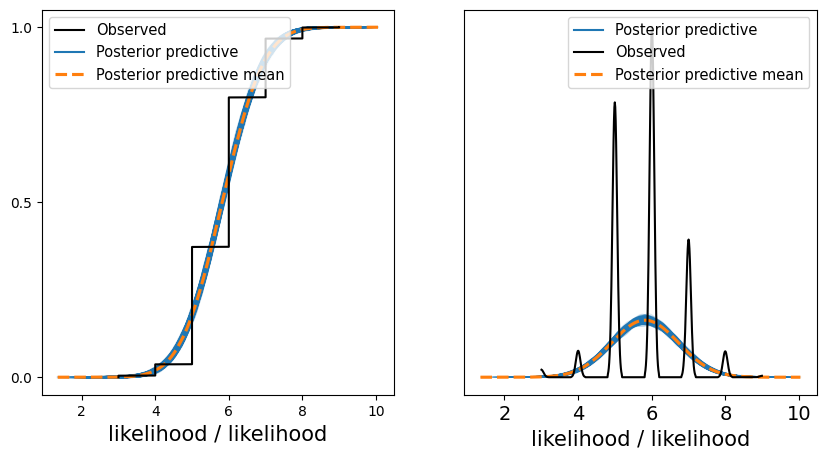

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post, group='posterior', ax=axes[1])

In [ ]:
coords = {"colors":np.unique(colors_train)}
colors_idx = pd.Categorical(colors_train, categories=['red', 'white']).codes

with pm.Model(coords=coords) as regression_h:
  betas = pm.Normal("betas",0,1,shape=11)
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)
  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

# Análise preditiva a Priori do segundo modelo

Exercício

# Aprendizado dos parâmetros do segundo modelo

In [ ]:
with regression_h:
  trace_reg_h = pm.sample()

pm.summary(trace_reg_h)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.118,0.024,0.073,0.164,0.001,0.001,828.0,1126.0,1.0
betas[1],-0.252,0.016,-0.284,-0.224,0.000,0.000,1654.0,1524.0,1.0
betas[2],-0.015,0.014,-0.042,0.010,0.000,0.000,1875.0,1236.0,1.0
betas[3],0.305,0.034,0.242,0.367,0.001,0.001,688.0,1011.0,1.0
betas[4],-0.011,0.014,-0.036,0.016,0.000,0.000,2106.0,1633.0,1.0
betas[5],0.106,0.017,0.075,0.137,0.000,0.000,1680.0,1283.0,1.0
betas[6],-0.096,0.023,-0.137,-0.052,0.001,0.000,1204.0,1207.0,1.0
betas[7],-0.301,0.050,-0.389,-0.201,0.002,0.001,665.0,869.0,1.0
betas[8],0.081,0.018,0.047,0.113,0.001,0.000,854.0,1155.0,1.0
betas[9],0.113,0.014,0.085,0.137,0.000,0.000,2255.0,1692.0,1.0


# Análise preditiva a posteriori do segundo modelo

In [ ]:
with regression_h:
    trace_reg_post_h = pm.sample_posterior_predictive(trace_reg_h)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


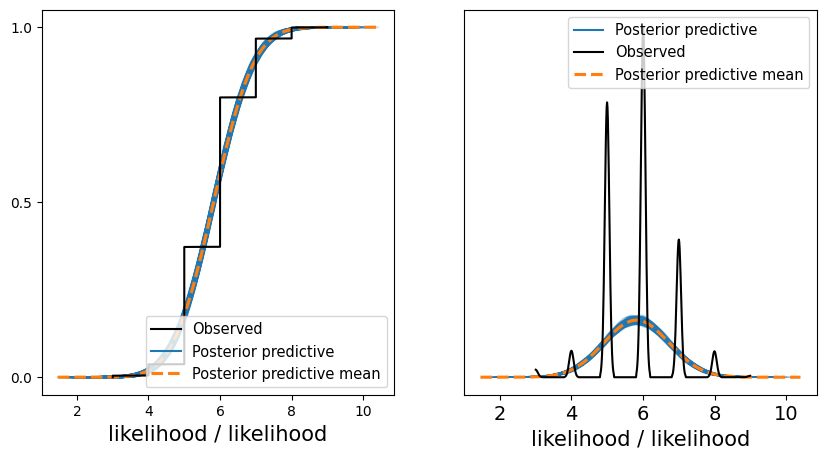

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post_h, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post_h, group='posterior', ax=axes[1])

In [ ]:
with pm.Model(coords=coords) as regression_h_2:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y_train.quality.values)

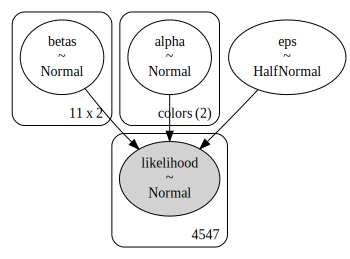

In [ ]:
pm.model_to_graphviz(regression_h_2)

# Análise preditiva a Priori do terceiro modelo

Exercício

# Aprendizado dos parâmetros

In [ ]:
with regression_h_2:
  trace_reg_h_2 = pm.sample()
pm.summary(trace_reg_h_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.078,0.046,-0.015,0.161,0.001,0.001,1364.0,1397.0,1.0
"betas[0, 1]",0.079,0.030,0.020,0.134,0.001,0.001,1087.0,1424.0,1.0
"betas[1, 0]",-0.197,0.028,-0.247,-0.143,0.001,0.000,1990.0,1667.0,1.0
"betas[1, 1]",-0.307,0.022,-0.349,-0.268,0.000,0.000,2064.0,1683.0,1.0
"betas[2, 0]",-0.050,0.030,-0.108,0.005,0.001,0.001,2041.0,1282.0,1.0
"betas[2, 1]",-0.002,0.016,-0.032,0.026,0.000,0.000,2529.0,1391.0,1.0
"betas[3, 0]",0.132,0.097,-0.040,0.315,0.002,0.002,1665.0,1644.0,1.0
"betas[3, 1]",0.355,0.040,0.275,0.425,0.001,0.001,989.0,1357.0,1.0
"betas[4, 0]",-0.030,0.021,-0.069,0.011,0.000,0.000,2221.0,1576.0,1.0
"betas[4, 1]",-0.008,0.023,-0.052,0.031,0.001,0.001,1921.0,1417.0,1.0


# Análise preditiva a Posteriori do terceiro modelo

In [ ]:
with regression_h_2:
    trace_reg_post_h_2 = pm.sample_posterior_predictive(trace_reg_h_2)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


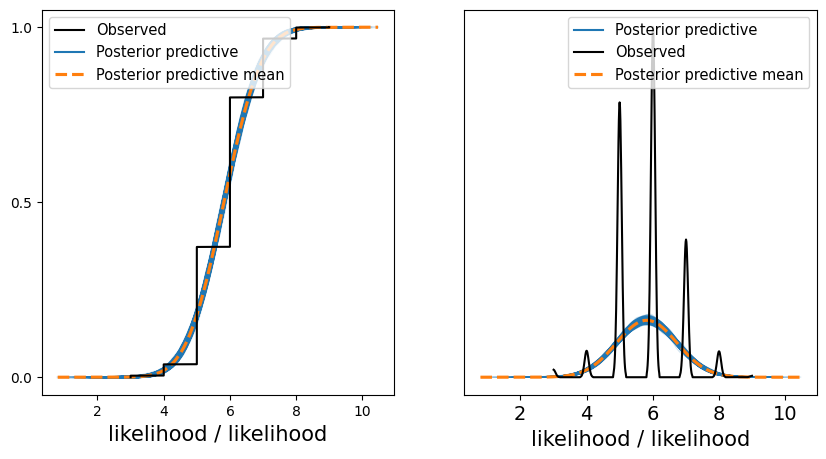

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_reg_post_h_2, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_reg_post_h_2, group='posterior', ax=axes[1])

# Modelos Lineares Generalizados (GLMs)

Os Modelos Lineares Generalizados (GLMs) expandem os modelos lineares tradicionais, permitindo a modelagem de respostas que obedecem a diferentes distribuições de probabilidade (por exemplo, binomial, Poisson, normal, entre outras) e facilitando o estudo de relações não-lineares através de funções de link apropriadas. Essas funções conectam a combinação linear das variáveis independentes com a média da distribuição da variável dependente.

# Funções de link
As funções de link mais comuns incluem:
- **Logit** para regressão logística, modelando probabilidades em um cenário binário.
- **Log** para regressão de Poisson, relacionando contagens e taxas.
- **Identidade** para regressão linear, onde a relação é diretamente proporcional.

Vejamos abaixo dois modelos conhecidos.

# Regressão de Poisson
A regressão de Poisson é utilizada para modelar contagens ou eventos que ocorrem em um intervalo fixo, assumindo que os dados seguem uma distribuição de Poisson. É particularmente útil quando a variável de resposta representa contagens e se espera que a variância seja aproximadamente igual à média.

$ y \sim Poisson(\lambda) \\
\log(\lambda) = a + \beta \cdot X $

Onde $y$ são as contagens observadas, $\lambda$ é a média da distribuição de Poisson, $a$ é o intercepto, $\beta$ representa os coeficientes das variáveis independentes $X$, e a função log é usada como a função de link.

# Regressão Não-Binomial (Negative Binomial)
A regressão Não-Binomial, ou regressão binomial negativa, é apropriada para dados de contagem que apresentam superdispersão, ou seja, quando a variância excede significativamente a média. Esta modelagem oferece um parâmetro adicional para acomodar a variância extra, tornando-a mais flexível que a regressão de Poisson para dados de contagem com superdispersão.

$ y \sim NegBinom(\mu, \theta) \\
\log(\mu) = \alpha + \beta \cdot X $

Neste modelo, $y$ representa as contagens observadas, $\mu$ é a média da distribuição binomial negativa, $\theta$ é o parâmetro que controla a dispersão, $\alpha$ é o intercepto, $\beta$ são os coeficientes das variáveis independentes $X$, e a função log serve como a função de link.


# Priori para $\theta$

Usar a distribuição Gamma como a priori para o parâmetro de dispersão $\theta$ na regressão binomial negativa permite modelar flexivelmente a variabilidade nos dados de contagem com superdispersão. A escolha se deve à capacidade da Gamma de assumir apenas valores positivos, alinhando-se com a natureza de $\theta$, que quantifica a dispersão adicional além da Poisson. Através dos parâmetros de forma e taxa, a priori Gamma possibilita incorporar conhecimento ou crenças prévias sobre o grau de dispersão, ajudando a guiar a inferência bayesiana em direção a estimativas mais precisas.

A distribuição Gamma é caracterizada por dois parâmetros principais, forma $k$ e taxa $\tau$, que determinam seu comportamento:

- **Forma $k$**: Influencia o formato da distribuição. Valores maiores de $k$ tendem a produzir uma distribuição mais simétrica e deslocada para a direita, indicando uma maior dispersão.
- **Taxa $\tau$**: Inversamente relacionada à escala da distribuição. Um $\tau$ maior resulta em uma distribuição mais concentrada próximo de zero, enquanto um $\tau$ menor indica que a distribuição se espalha sobre um intervalo mais amplo de valores positivos.

Juntos, $k$ e $\tau$ controlam a média e a variância da distribuição Gamma, tornando-a flexível para modelar uma variedade de comportamentos em dados contínuos e positivos.




In [ ]:
import pytensor.tensor as tt

with pm.Model(coords=coords) as regression_p:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.Poisson("likelihood",tt.exp(mu),observed=y_train.quality.values)

In [ ]:
with regression_p:
  trace_p = pm.sample()

pm.summary(trace_p)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.012,0.026,-0.039,0.057,0.001,0.001,1327.0,1368.0,1.0
"betas[0, 1]",0.016,0.018,-0.018,0.048,0.001,0.000,1155.0,1420.0,1.0
"betas[1, 0]",-0.037,0.016,-0.071,-0.008,0.000,0.000,1720.0,1279.0,1.0
"betas[1, 1]",-0.055,0.013,-0.080,-0.031,0.000,0.000,2329.0,1788.0,1.0
"betas[2, 0]",-0.011,0.017,-0.044,0.020,0.000,0.000,1882.0,1423.0,1.0
"betas[2, 1]",-0.000,0.009,-0.017,0.018,0.000,0.000,2312.0,1335.0,1.0
"betas[3, 0]",0.021,0.056,-0.083,0.119,0.001,0.001,1565.0,1456.0,1.0
"betas[3, 1]",0.064,0.023,0.020,0.109,0.001,0.001,957.0,1359.0,1.0
"betas[4, 0]",-0.006,0.012,-0.027,0.017,0.000,0.000,1948.0,1435.0,1.0
"betas[4, 1]",-0.003,0.013,-0.025,0.024,0.000,0.000,2549.0,1225.0,1.0


In [ ]:
with regression_p:
    trace_post_p = pm.sample_posterior_predictive(trace_p)

array([<Axes: xlabel='likelihood / likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


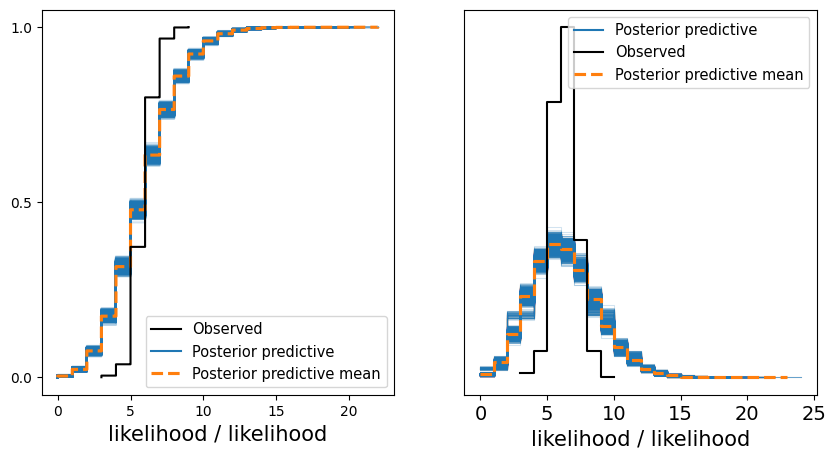

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_post_p, group='posterior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_post_p, group='posterior', ax=axes[1])

In [ ]:
with pm.Model(coords=coords) as regression_nb:
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  alpha_disp = pm.Gamma("alpha_disp", alpha=2, beta=0.1)

  mu = alpha[colors_idx] + (betas[0][colors_idx] * fixed_acidity_train +
                betas[1][colors_idx] * volatile_acidity_train +
                betas[2][colors_idx] * citric_acid_train +
                betas[3][colors_idx] * residual_sugar_train +
                betas[4][colors_idx] * chlorides_train +
                betas[5][colors_idx] * free_sulfur_dioxide_train +
                betas[6][colors_idx] * total_sulfur_dioxide_train +
                betas[7][colors_idx] * density_train +
                betas[8][colors_idx] * pH_train +
                betas[9][colors_idx] * sulphates_train +
                betas[10][colors_idx] * alcohol_train)

  likelihood = pm.NegativeBinomial("likelihood", mu=tt.exp(mu), alpha=alpha_disp, observed=y_train.quality.values)

In [ ]:
with regression_nb:
  trace_nb = pm.sample()

pm.summary(trace_nb)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.012,0.026,-0.035,0.064,0.001,0.001,1526.0,1449.0,1.0
"betas[0, 1]",0.016,0.018,-0.015,0.052,0.000,0.000,1388.0,1504.0,1.0
"betas[1, 0]",-0.037,0.017,-0.069,-0.007,0.000,0.000,2010.0,1496.0,1.0
"betas[1, 1]",-0.056,0.013,-0.081,-0.031,0.000,0.000,2746.0,1300.0,1.0
"betas[2, 0]",-0.010,0.017,-0.041,0.024,0.000,0.000,2060.0,1501.0,1.0
"betas[2, 1]",-0.000,0.009,-0.017,0.019,0.000,0.000,2734.0,1221.0,1.0
"betas[3, 0]",0.021,0.055,-0.092,0.118,0.001,0.001,1491.0,1509.0,1.0
"betas[3, 1]",0.063,0.024,0.020,0.111,0.001,0.001,1187.0,1236.0,1.0
"betas[4, 0]",-0.006,0.013,-0.031,0.016,0.000,0.000,2188.0,1531.0,1.0
"betas[4, 1]",-0.002,0.013,-0.028,0.021,0.000,0.000,2428.0,1581.0,1.0


In [ ]:
import pytensor.tensor as tt

with pm.Model(coords=coords) as regression_p_2:
  betas = pm.Normal("betas",0,1,shape=11)
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[colors_idx] + (betas[0] * fixed_acidity_train +
                betas[1] * volatile_acidity_train +
                betas[2] * citric_acid_train +
                betas[3] * residual_sugar_train +
                betas[4] * chlorides_train +
                betas[5] * free_sulfur_dioxide_train +
                betas[6] * total_sulfur_dioxide_train +
                betas[7] * density_train +
                betas[8] * pH_train +
                betas[9] * sulphates_train +
                betas[10] * alcohol_train)

  likelihood = pm.Poisson("likelihood",tt.exp(mu),observed=y_train.quality.values)

In [ ]:
with regression_p_2:
  trace_p_2 = pm.sample()
pm.summary(trace_p_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.020,0.014,-0.007,0.045,0.001,0.000,666.0,1024.0,1.0
betas[1],-0.046,0.009,-0.064,-0.030,0.000,0.000,2014.0,1663.0,1.0
betas[2],-0.003,0.008,-0.018,0.011,0.000,0.000,2854.0,1692.0,1.0
betas[3],0.052,0.020,0.017,0.089,0.001,0.001,635.0,1080.0,1.0
betas[4],-0.002,0.009,-0.018,0.014,0.000,0.000,2346.0,1749.0,1.0
betas[5],0.018,0.009,0.001,0.037,0.000,0.000,1935.0,1397.0,1.0
betas[6],-0.016,0.013,-0.041,0.005,0.000,0.000,1406.0,1392.0,1.0
betas[7],-0.050,0.030,-0.105,0.005,0.001,0.001,544.0,741.0,1.0
betas[8],0.014,0.010,-0.003,0.033,0.000,0.000,935.0,1157.0,1.0
betas[9],0.019,0.007,0.005,0.033,0.000,0.000,1927.0,1548.0,1.0


In [ ]:
with regression:
    pm.compute_log_likelihood(trace_reg)

with regression_h:
    pm.compute_log_likelihood(trace_reg_h)

with regression_h_2:
    pm.compute_log_likelihood(trace_reg_h_2)

with regression_p:
    pm.compute_log_likelihood(trace_p)

In [ ]:
with regression_nb:
    pm.compute_log_likelihood(trace_nb)

In [ ]:
with regression_p_2:
  pm.compute_log_likelihood(trace_p_2)

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

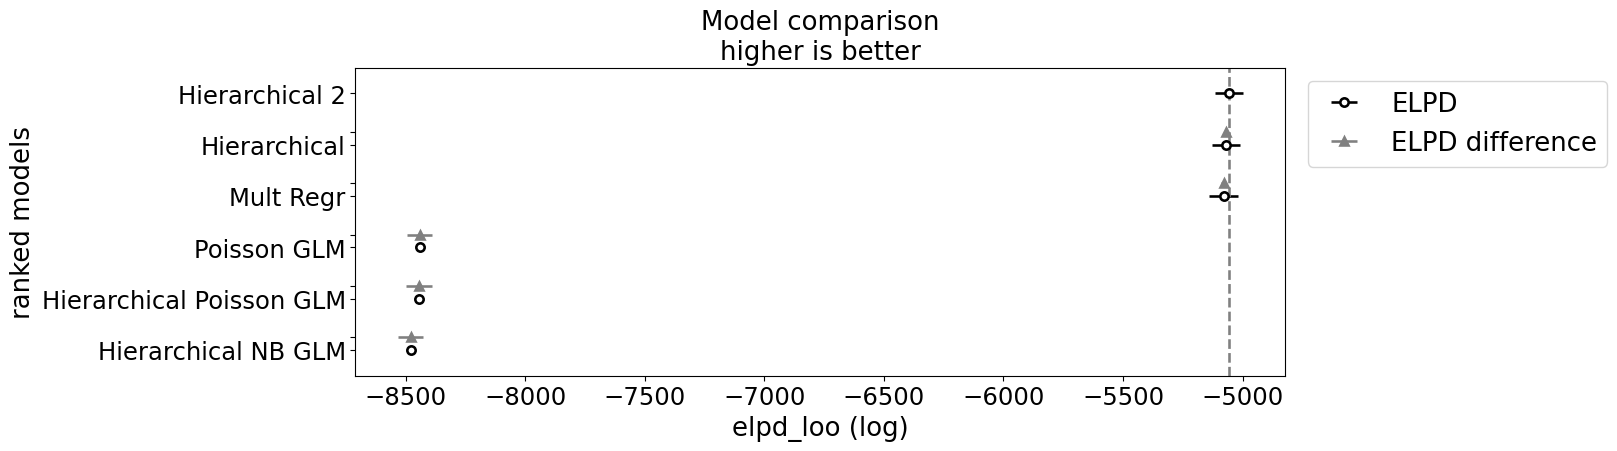

In [ ]:
model_compare = az.compare(
    {
        "Mult Regr": trace_reg,
        "Hierarchical": trace_reg_h,
        "Hierarchical 2": trace_reg_h_2,
        "Hierarchical Poisson GLM": trace_p,
        "Poisson GLM": trace_p_2,
        "Hierarchical NB GLM": trace_nb
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Hierarchical 2,0,-5056.394932,29.613949,0.000000,0.930633,58.529775,0.000000,True,log
Hierarchical,1,-5070.584451,15.869176,14.189519,0.054433,58.321929,8.919667,True,log
Mult Regr,2,-5079.753362,13.715121,23.358430,0.014934,58.995756,11.461268,False,log
Poisson GLM,3,-8441.592569,1.341026,3385.197637,0.000000,7.152829,53.793642,False,log
Hierarchical Poisson GLM,4,-8445.478214,2.771252,3389.083282,0.000000,7.101498,53.726226,False,log
Hierarchical NB GLM,5,-8479.505933,2.761847,3423.111001,0.000000,7.144703,53.811822,False,log


In [ ]:
with pm.Model(coords=coords) as regression_h_2_m:
  f_a = pm.MutableData("f_a", fixed_acidity_train)
  v_a = pm.MutableData("v_a", volatile_acidity_train)
  c_a = pm.MutableData("c_a", citric_acid_train)
  r_s = pm.MutableData("r_s", residual_sugar_train)
  chl = pm.MutableData("chl", chlorides_train)
  f_s_d = pm.MutableData("f_s_d", free_sulfur_dioxide_train)
  t_s_d = pm.MutableData("t_s_d", total_sulfur_dioxide_train)
  den = pm.MutableData("den", density_train)
  pH = pm.MutableData("pH", pH_train)
  sul = pm.MutableData("sul", sulphates_train)
  alc = pm.MutableData("alc", alcohol_train)
  c_i = pm.MutableData("colors", pd.Categorical(colors_train, categories=['red', 'white']).codes)
  y = pm.MutableData("y",y_train.quality.values)
  betas = pm.Normal("betas",0,1,shape=(11,2))
  alpha = pm.Normal("alpha",0,1,dims="colors")
  eps = pm.HalfNormal("eps",1)

  mu = alpha[c_i] + (betas[0][c_i] * f_a +
                betas[1][c_i] * v_a +
                betas[2][c_i] * c_a +
                betas[3][c_i] * r_s +
                betas[4][c_i] * chl +
                betas[5][c_i] * f_s_d +
                betas[6][c_i] * t_s_d +
                betas[7][c_i] * den +
                betas[8][c_i] * pH +
                betas[9][c_i] * sul +
                betas[10][c_i] * alc)

  likelihood = pm.Normal("likelihood",mu,eps,observed=y)

In [ ]:
with regression_h_2_m:
  trace_m = pm.sample()

In [ ]:
with regression_h_2_m:
    pm.set_data({
        "f_a": X_test.fixed_acidity.values,
        "v_a": X_test.volatile_acidity.values,
        "c_a": X_test.citric_acid.values,
        "r_s": X_test.residual_sugar.values,
        "chl": X_test.chlorides.values,
        "f_s_d": X_test.free_sulfur_dioxide.values,
        "t_s_d": X_test.total_sulfur_dioxide.values,
        "den": X_test.density.values,
        "pH": X_test.pH.values,
        "sul": X_test.sulphates.values,
        "alc": X_test.alcohol.values,
        "y": y_test.quality.values,
        "colors": pd.Categorical(X_test.colors.values, categories=['red', 'white']).codes
    })
    trace_post_m = pm.sample_posterior_predictive(trace_m)

In [ ]:
trace_post_m

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [ ]:
preds = trace_post_m.posterior_predictive["likelihood"].mean(["chain","draw"]).to_numpy()

In [ ]:
rounded_preds = np.round(preds)

df_predictions = pd.DataFrame({
    'Predicted': rounded_preds,
    'Actual': y_test.quality.values
})

df_predictions['Abs_Difference'] = np.abs(df_predictions['Predicted'] - df_predictions['Actual'])

print(df_predictions.head())
print(df_predictions['Abs_Difference'].sum())

zero_diff_count = (df_predictions['Abs_Difference'] == 0).sum()
print(zero_diff_count)
print(zero_diff_count/len(y_test.quality.values))


   Predicted  Actual  Abs_Difference
0        7.0       8             1.0
1        5.0       5             0.0
2        6.0       7             1.0
3        6.0       6             0.0
4        5.0       6             1.0
985.0
1049
0.5379487179487179


# Exercícios

1) Melhore a acurácia do modelo visto acima (usar um modelo melhor).

2) Use o dataset https://archive.ics.uci.edu/dataset/9/auto+mpg e derive o melhor modelo, analise as predições e calcule o erro do seu melhor modelo.